In [5]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt  # 绘制二维图
import seaborn as sns # 
%matplotlib inline  
# 魔法命令
#如果你在使用Jupyter Notebook，你会需要这样一句命令来让你的图像显示


print(np.__version__)
print(pd.__version__)
print(mpl.__version__)
print(sns.__version__)


#导入数据
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

#提取标签中的类别
print(midwest['category'])
categories = np.unique(midwest['category']) # 去除所有重复的项目
print(categories) #这就是我们要使用的标签的类别列表

1.19.2
1.1.5
3.3.4
0.11.1
0      AAR
1      LHR
2      AAR
3      ALU
4      AAR
      ... 
327    AAR
328    AAR
329    AAR
330    AAR
331    AAR
Name: category, Length: 332, dtype: object
['AAR' 'AAU' 'AHR' 'ALR' 'ALU' 'HAR' 'HAU' 'HHR' 'HLR' 'HLU' 'LAR' 'LAU'
 'LHR' 'LHU']


In [6]:
# 列表推导式
color = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]
# print(color)
## 等价于
color = []
for i in range(len(categories)):
    color.append(plt.cm.tab10(i/float(len(categories) - 1)))
# print(np.array(color).reshape(1,-1))
print(color)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]


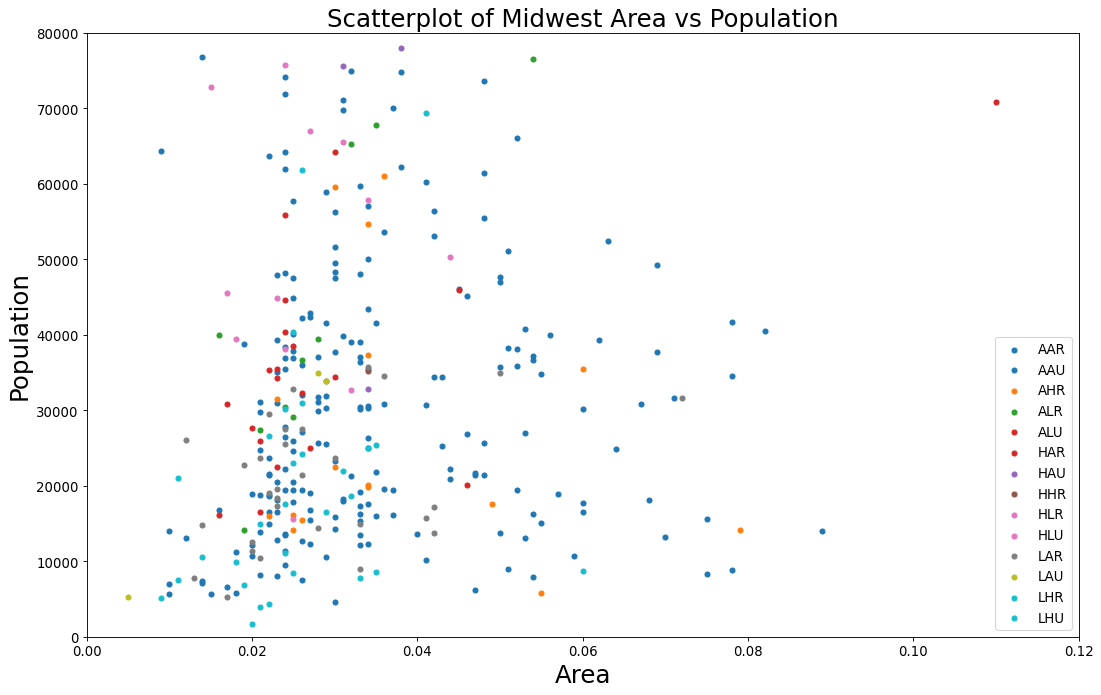

In [7]:

#丰富我们的图像

# 准备标签列表和颜色列表

categories = np.unique(midwest['category']) # 去除所有重复的项目
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]


#对每一个标签类别进行绘图
plt.figure(figsize=(16, 10)   #绘图尺寸
           , dpi=80           #图像分辨率
           , facecolor='w'    # 白色缩写w  图像的背景颜色，设置为白色，默认也是白色
           , edgecolor='k'    #黑色缩写k（防止和蓝色blue混）图像的边框颜色，设置为黑色，默认也是黑色
          )

#进行循环绘图(注意和下面区别)
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',  # 输入x列名和y列名，然后用data将所有数据传进来，然后通过列名提取这两列数据
                data=midwest.loc[midwest.category==category, :], # loc基于行和列索引
                s=20, c=np.array(plt.cm.tab10(i/float(len(categories)-1))).reshape(1,-1),label=str(category))

# for i in range(len(categories)):
#     plt.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
#                 ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
#                 ,s=20
#                 ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1) #  i/len(categories)  利用循环中的i来生成14个不同的小数
#                 ,label=categories[i]
#                )



#注意到这里的数据获取方法和我们刚才写的不同了吗？

#对图像进行装饰
# 获取当前子图，如果当前没有任何子图的话，帮我创建一个新的子图。
# midwest["area"].min() / .max()自己找横坐标范围
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 80000)) #控制横纵坐标的范围  
plt.xticks(fontsize=12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22) #坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12, loc="best") #图例的字体大小
plt.show()

